In [1]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
%matplotlib inline

import math

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\user\Downloads\Walmart Data Analysis and Forcasting.csv")
df.head()

Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106

In [3]:
print(f'there are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

there are 6435 rows and 8 columns in the dataset.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df[df.duplicated()]

Empty DataFrame
Columns: [Store, Date, Weekly_Sales, Holiday_Flag, Temperature, Fuel_Price, CPI, Unemployment]
Index: []

In [7]:
print(f'There are {df.duplicated().sum()} duplicates in the data set.')

There are 0 duplicates in the data set.


In [8]:
df.nunique()

Store             45
Date             143
Weekly_Sales    6435
Holiday_Flag       2
Temperature     3528
Fuel_Price       892
CPI             2145
Unemployment     349
dtype: int64

In [9]:
df['Day'] = pd.DatetimeIndex(df.Date).day
df['Week']= pd.DatetimeIndex(df.Date).week
df['Month']= pd.DatetimeIndex(df.Date).month
df['Year']= pd.DatetimeIndex(df.Date).year
df.drop('Date', axis=1, inplace=True)


In [10]:
df.head()

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  \
0      1    1643690.90             0        42.31       2.572  211.096358   
1      1    1641957.44             1        38.51       2.548  211.242170   
2      1    1611968.17             0        39.93       2.514  211.289143   
3      1    1409727.59             0        46.63       2.561  211.319643   
4      1    1554806.68             0        46.50       2.625  211.350143   

   Unemployment  Day  Week  Month  Year  
0         8.106    2    17      5  2010  
1         8.106    2    48     12  2010  
2         8.106   19     7      2  2010  
3         8.106   26     8      2  2010  
4         8.106    3    18      5  2010

In [11]:
df.Day.value_counts()

2     270
3     270
6     270
25    225
10    225
24    225
17    225
9     225
27    225
20    225
13    225
8     225
19    225
7     225
18    225
30    225
26    225
16    225
23    225
4     225
5     180
14    180
28    180
21    180
15    180
22    180
29    180
11    180
12    180
31     90
1      90
Name: Day, dtype: int64

In [12]:
df[['Weekly_Sales', 'CPI']].describe().round(1)

Weekly_Sales     CPI
count        6435.0  6435.0
mean      1046964.9   171.6
std        564366.6    39.4
min        209986.2   126.1
25%        553350.1   131.7
50%        960746.0   182.6
75%       1420158.7   212.7
max       3818686.4   227.2

In [13]:
df.Weekly_Sales.nlargest(15).round(1)

1905    3818686.4
2763    3766687.4
1333    3749057.7
527     3676389.0
1762    3595903.2
1814    3556766.0
2815    3555371.0
475     3526713.4
1385    3487986.9
189     3436007.7
1957    3369069.0
241     3224369.8
3764    3078162.1
523     3004702.3
1381    2950198.6
Name: Weekly_Sales, dtype: float64

In [14]:
print(f' The total weekly sales of all the stores {df.Weekly_Sales.sum()}.')

 The total weekly sales of all the stores 6737218987.11.


In [15]:
print(f'the average of all the stores is {df.Weekly_Sales.mean()}.')

the average of all the stores is 1046964.8775617732.


In [16]:
print(f"The total number of walmart stores considered is {df.Store.nunique()}")

The total number of walmart stores considered is 45


In [17]:
print(f"The store with the highest weekly sales is {df.groupby('Store')['Weekly_Sales'].sum().idxmax()}")

The store with the highest weekly sales is 20


In [18]:
print(f" the store with the lowest weekly sales is {df.groupby('Store')['Weekly_Sales'].sum().idxmin()}")

 the store with the lowest weekly sales is 33


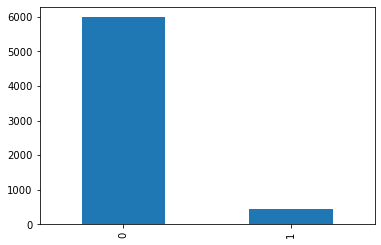

In [19]:
df.Holiday_Flag.value_counts().plot.bar();

In [20]:
df.describe()

Store  Weekly_Sales  Holiday_Flag  Temperature   Fuel_Price  \
count  6435.000000  6.435000e+03   6435.000000  6435.000000  6435.000000   
mean     23.000000  1.046965e+06      0.069930    60.663782     3.358607   
std      12.988182  5.643666e+05      0.255049    18.444933     0.459020   
min       1.000000  2.099862e+05      0.000000    -2.060000     2.472000   
25%      12.000000  5.533501e+05      0.000000    47.460000     2.933000   
50%      23.000000  9.607460e+05      0.000000    62.670000     3.445000   
75%      34.000000  1.420159e+06      0.000000    74.940000     3.735000   
max      45.000000  3.818686e+06      1.000000   100.140000     4.468000   

               CPI  Unemployment          Day         Week        Month  \
count  6435.000000   6435.000000  6435.000000  6435.000000  6435.000000   
mean    171.578394      7.999151    15.650350    26.000000     6.475524   
std      39.356712      1.875885     8.753908    14.511794     3.321797   
min     126.064000      3.879000     1.000000     1.000000     1.000000   
25%     131.735000      6.891000     8.000000    14.000000     4.000000   
50%     182.616521      7.874000    16.000000    26.000000     6.000000   
75%     212.743293      8.622000    23.000000    38.000000     9.000000   
max     227.232807     14.313000    31.000000    52.000000    12.000000   

              Year  
count  6435.000000  
mean   2010.965035  
std       0.797019  
min    2010.000000  
25%    2010.000000  
50%    2011.000000  
75%    2012.000000  
max    2012.000000

<Figure size 1008x576 with 0 Axes>

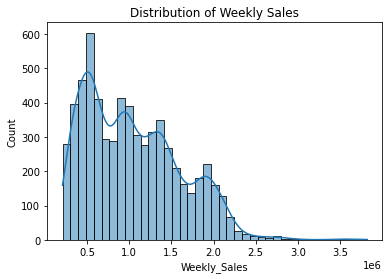

<Figure size 1008x576 with 0 Axes>

In [21]:
sns.histplot(x = "Weekly_Sales", data = df, kde=True)
plt.title("Distribution of Weekly Sales")
plt.figure(figsize=(14,8))

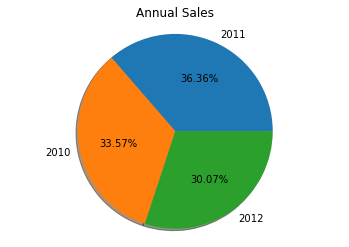

In [22]:
plt.pie(df.Year.value_counts().values, labels=df.Year.value_counts().index, autopct='%1.2f%%', shadow=True)
plt.title('Annual Sales')
plt.axis('equal')
plt.show()

In [23]:
fig = px.pie(df, values='Weekly_Sales', names='Year', title='Weekly Sales by Year',
             hover_data=['Weekly_Sales'], labels={'Weekly_Sales': 'Sales'},
            color_discrete_sequence=['dodgerblue'])

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))

fig.show()

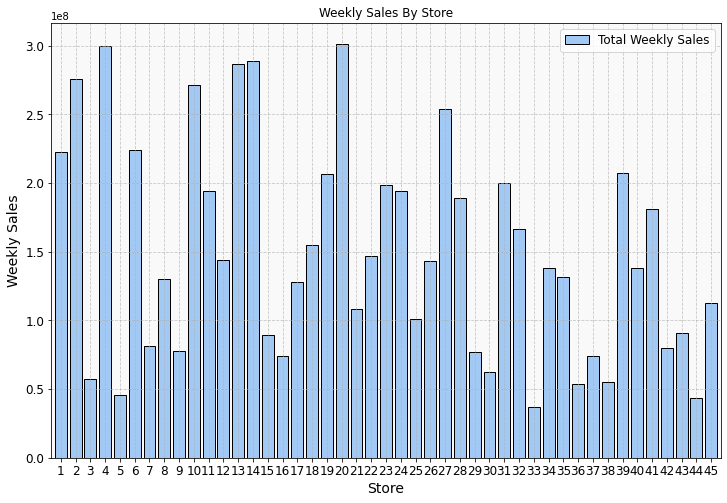

In [24]:
sns.set_palette("pastel")
plt.figure(figsize=(12,8))
df.groupby('Store')['Weekly_Sales'].sum().plot(kind='bar', edgecolor='black', width= 0.8)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Store', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.title('Weekly Sales By Store')
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.legend(['Total Weekly Sales'], fontsize=12)
plt.gca().set_facecolor('#f9f9f9')


Text(0.5, 1.0, 'Daily Sales')

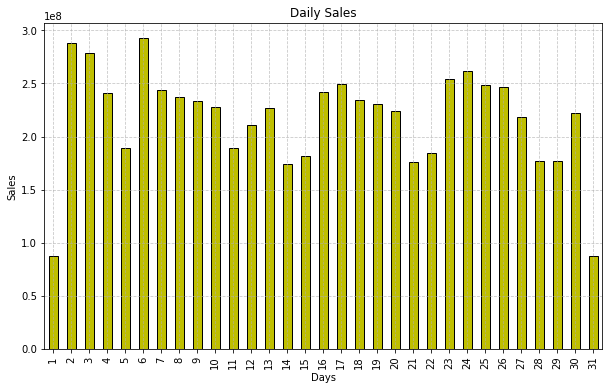

In [25]:
plt.figure(figsize=(10, 6))
df.groupby('Day')['Weekly_Sales'].sum().plot(kind='bar', color="y", edgecolor="black")
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Days')
plt.ylabel('Sales')
plt.title('Daily Sales')

Text(0.5, 1.0, 'Monthly Sales')

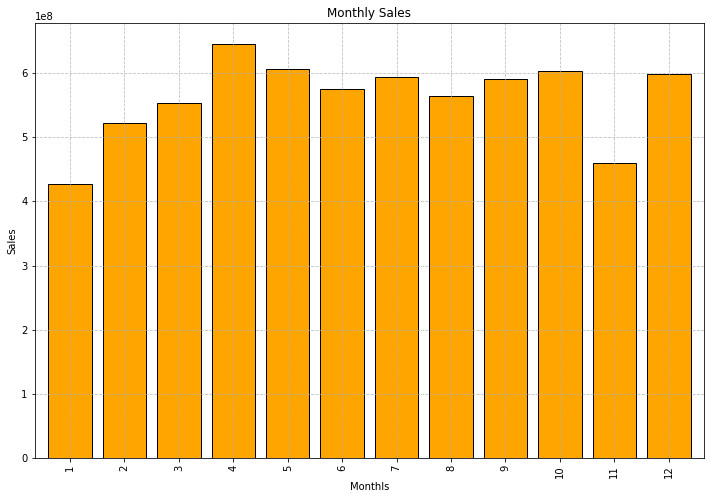

In [26]:
sns.set_palette("pastel")
plt.figure(figsize=(12, 8))
df.groupby('Month')['Weekly_Sales'].sum().plot(kind='bar', color="orange", edgecolor='black', width=0.8)
plt.grid(True, linestyle='--', alpha=0.8)
plt.xlabel('Monthls')
plt.ylabel('Sales')
plt.title('Monthly Sales')

Text(0.5, 1.0, 'Weekly Sales')

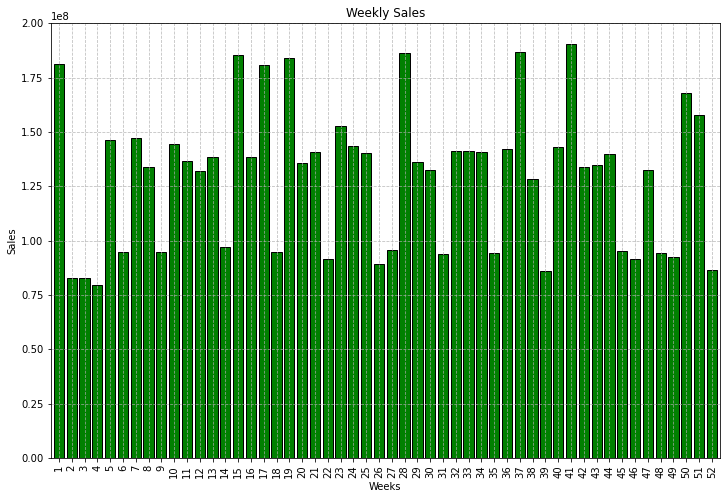

In [27]:
sns.set_palette("pastel")
plt.figure(figsize=(12,8))
df.groupby('Week')['Weekly_Sales'].sum().plot(kind='bar', color='green', edgecolor='black', width=0.8)
plt.grid(True, linestyle='--', alpha=0.8)
plt.xlabel('Weeks')
plt.ylabel('Sales')
plt.title('Weekly Sales')

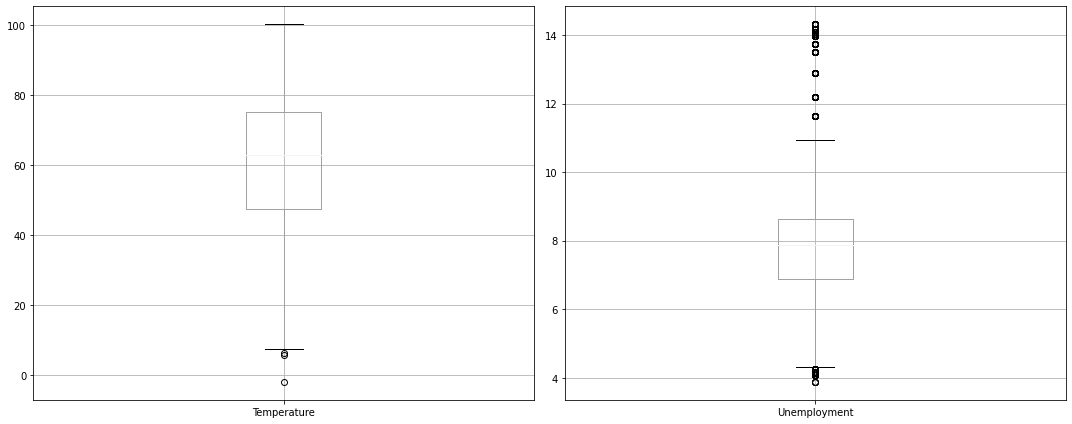

In [28]:
features = [ 'Temperature', 'Unemployment']
n = 2
plt.figure(figsize=[15,6*math.ceil(len(features)/n)])
for i in range(len(features)):
    plt.subplot(math.ceil(len(features)/n),n,i+1)
    df.boxplot(features[i])
plt.tight_layout()
plt.show()

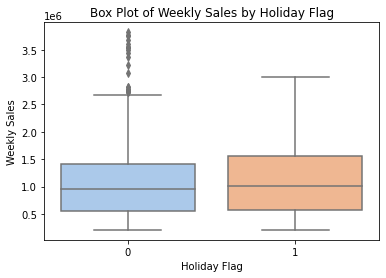

In [29]:
sns.boxplot(x = df.Holiday_Flag, y = df.Weekly_Sales);

plt.title('Box Plot of Weekly Sales by Holiday Flag')
plt.xlabel('Holiday Flag')
plt.ylabel('Weekly Sales');

In [30]:
df1=df.copy()

In [31]:
for i in features:
    Q1=df1[i].quantile(0.25)
    Q3=df1[i].quantile(0.75)
    IQR =Q3-Q1
    
    df1=df[df[i] <= (Q3+(IQR*1.5))]
    df1=df[df[i] >= (Q1-(IQR*1.5))]
    df1= df1.reset_index(drop=True)
    
 

In [32]:
display(df.shape)
display(df1.shape)

(6435, 11)

(6332, 11)

In [33]:
df=df1.copy()

In [34]:
df.shape

(6332, 11)

Text(0.5, 1.0, 'CPI by Year')

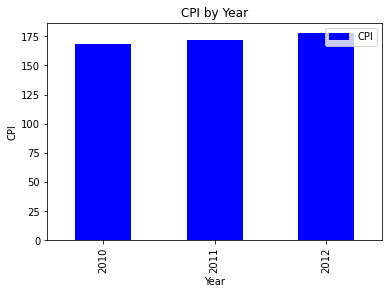

In [35]:
df[['Year', 'CPI']] .groupby(['Year'],as_index=True).mean().sort_values(by='CPI', ascending=True).plot.bar(color=['blue']);

plt.xlabel('Year')
plt.ylabel('CPI')
plt.title('CPI by Year')

Text(0.5, 1.0, 'Average Weekly Sales by Year')

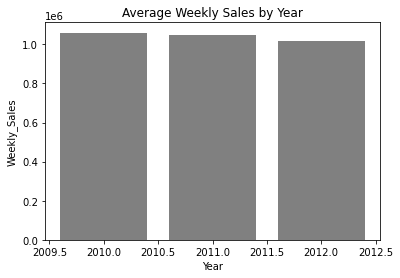

In [36]:
grouped_data = df[['Year', 'Weekly_Sales']].groupby(['Year'], as_index=True).mean().sort_values(by='Weekly_Sales', ascending= False)
x= grouped_data.index
heights= grouped_data['Weekly_Sales']
plt.bar(x, heights, color="grey")
plt.xlabel('Year')
plt.ylabel('Weekly_Sales')
plt.title('Average Weekly Sales by Year')

<AxesSubplot:xlabel='Month'>

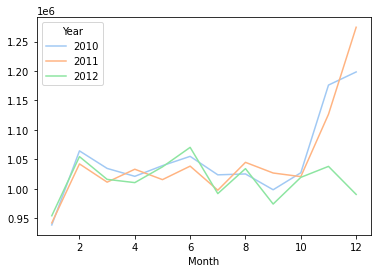

In [37]:
monthly_sales= pd.pivot_table(df, index="Month", columns="Year", values="Weekly_Sales")
monthly_sales.plot()

In [38]:
fig= px.pie(df, values=df['CPI'], names=df['Year'], hover_data=['Year'])
fig.update_traces(marker=dict(line=dict(color='blue', width=2)))
fig.update_layout(title='CPI by Year')
fig.show()

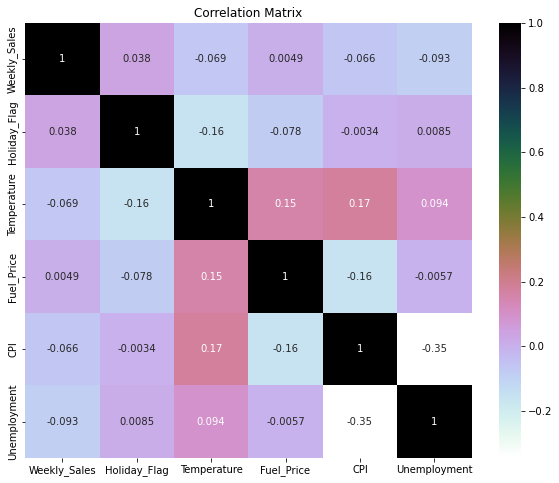

In [39]:
fig, ax = plt.subplots(figsize=(10,8))

corr = df[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='cubehelix_r', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

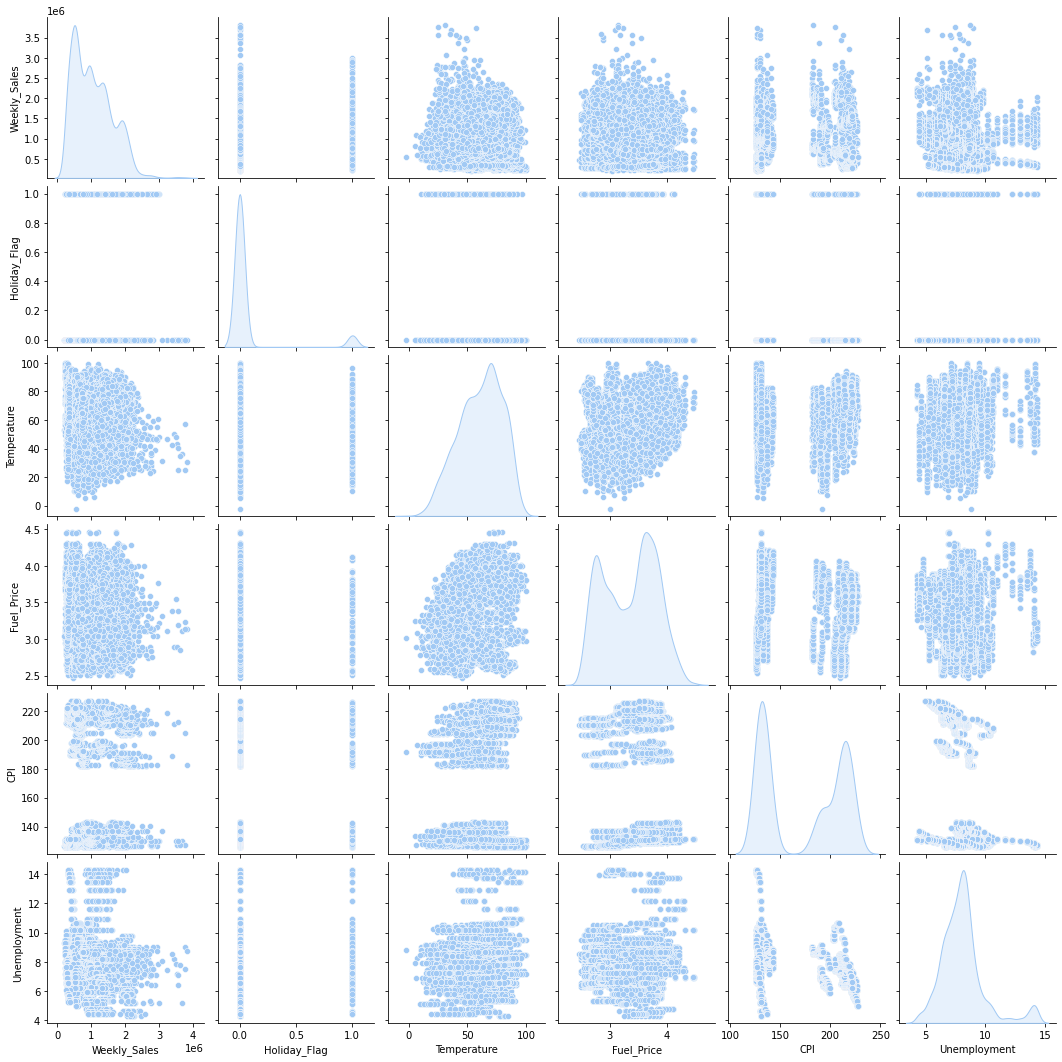

In [40]:
sns.pairplot(df [['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']] ,diag_kind = 'kde');

In [41]:
df = df[[col for col in df.columns if col != 'Weekly_Sales']+['Weekly_Sales']]
df

Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment  \
0         1             0        42.31       2.572  211.096358         8.106   
1         1             1        38.51       2.548  211.242170         8.106   
2         1             0        39.93       2.514  211.289143         8.106   
3         1             0        46.63       2.561  211.319643         8.106   
4         1             0        46.50       2.625  211.350143         8.106   
...     ...           ...          ...         ...         ...           ...   
6327     45             0        64.88       3.997  192.013558         8.684   
6328     45             0        64.89       3.985  192.170412         8.667   
6329     45             0        54.47       4.000  192.327265         8.667   
6330     45             0        56.47       3.969  192.330854         8.667   
6331     45             0        58.85       3.882  192.308899         8.667   

      Day  Week  Month  Year  Weekly_Sales  
0       2    17      5  2010    1643690.90  
1       2    48     12  2010    1641957.44  
2      19     7      2  2010    1611968.17  
3      26     8      2  2010    1409727.59  
4       3    18      5  2010    1554806.68  
...   ...   ...    ...   ...           ...  
6327   28    39      9  2012     713173.95  
6328   10    19      5  2012     733455.07  
6329   10    50     12  2012     734464.36  
6330   19    42     10  2012     718125.53  
6331   26    43     10  2012     760281.43  

[6332 rows x 11 columns]

In [42]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

In [48]:
print(f' The shape of x{X.shape}, and y {Y.shape}.')

 The shape of x(6332, 10), and y (6332,).


In [49]:
from sklearn.preprocessing import StandardScaler
st= StandardScaler()
x_scaled= st.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,Y, test_size=.30, random_state=42)


In [53]:
print('X_train shape is ' , X_train.shape)
print('y_train shape is ' , y_train.shape)

print('X_test shape is ' , X_test.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4432, 10)
y_train shape is  (4432,)
X_test shape is  (1900, 10)
y_test shape is  (1900,)


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.linear_model import LassoCV ,RidgeCV , ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score

In [68]:
def model(y_test,y_train,X_test,X_train,model):
    
    model1 = model()
    model1.fit(X_train,y_train)
    y_pred = model1.predict(X_test)
    r2=r2_score(y_test, y_pred)
    
    result = {
        'model_name': str(model1),
        'MSE': mean_squared_error(y_test, y_pred),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R2': f'{round(r2 * 100, 2)}%'
    }
    return result

In [69]:
x = [model(y_test,y_train,X_test,X_train,i) for i in [LinearRegression,Lasso,Ridge,
                                                      ElasticNet,RandomForestRegressor,DecisionTreeRegressor,
                                                      KNeighborsRegressor,GradientBoostingRegressor]]
x

[{'model_name': 'LinearRegression()',
  'MSE': 274081741757.99994,
  'MAE': 427169.52889829903,
  'R2': '15.86%'},
 {'model_name': 'Lasso()',
  'MSE': 274160037676.42554,
  'MAE': 427227.0051011884,
  'R2': '15.83%'},
 {'model_name': 'Ridge()',
  'MSE': 274150193732.06604,
  'MAE': 427220.95202796697,
  'R2': '15.83%'},
 {'model_name': 'ElasticNet()',
  'MSE': 282185600122.5047,
  'MAE': 438399.83788647776,
  'R2': '13.37%'},
 {'model_name': 'RandomForestRegressor()',
  'MSE': 13378624838.459576,
  'MAE': 62071.91193778947,
  'R2': '95.89%'},
 {'model_name': 'DecisionTreeRegressor()',
  'MSE': 22454067776.166817,
  'MAE': 77578.58850526315,
  'R2': '93.11%'},
 {'model_name': 'KNeighborsRegressor()',
  'MSE': 232860845173.88675,
  'MAE': 378130.4734705263,
  'R2': '28.51%'},
 {'model_name': 'GradientBoostingRegressor()',
  'MSE': 32208457797.102318,
  'MAE': 131918.73207533295,
  'R2': '90.11%'}]

In [75]:
best_model = max(x, key=lambda x: float(x['R2'].strip('%')))

print('Best Model:')
print('-----------------')
print(f'Model Name: {best_model["model_name"]}')
print(f'MSE: {best_model["MSE"]}')
print(f'MAE: {best_model["MAE"]}')
print(f'R2 : {best_model["R2"]}')

Best Model:
-----------------
Model Name: RandomForestRegressor()
MSE: 13378624838.459576
MAE: 62071.91193778947
R2 : 95.89%
